In [0]:
!mkdir dataset
from google.colab import files
src = list(files.upload().values())[0]
open('\dataset','wb').write(src)
!mv sample_mobile_data_1000.csv dataset/
!ls dataset

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!pip install -q tensorflow-gpu==2.0.0a0
!pip install -q tensorboard

In [0]:
!pip install -q tensorboardcolab
from tensorboardcolab import *


Digit recognition :)



In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import matplotlib.pyplot as plt
import os

# from tensorflow.examples.tutorials.mnist import input_data
# mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)  # y labels are oh-encoded
# n_train = mnist.train.num_examples  # 55,000
# n_validation = mnist.validation.num_examples  # 5000
# n_test = mnist.test.num_examples  # 10,000

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

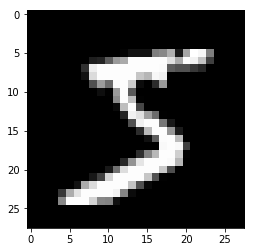

5

In [5]:
sample_digit = x_train[0] # sample_digit.reshape(28, 28)
plt.imshow(sample_digit, cmap='gray')
plt.show()
y_train[0]

In [0]:
def create_model():
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', 
                                     input_shape=(28,28,1))) 
 
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
    model.add(tf.keras.layers.Dropout(0.3))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.5))
    model.add(tf.keras.layers.Dense(10, activation='softmax'))
    model.compile(optimizer=tf.keras.optimizers.Adam(),
            loss=tf.keras.losses.sparse_categorical_crossentropy,
            metrics=['accuracy', ])
    return model
 
# Create a basic model instance
model = create_model()

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1568)              0         
__________

In [33]:
tbc=TensorBoardColab(port=6006, graph_path='/tmp/logs', startup_waiting_time=8)

Wait for 8 seconds...
TensorBoard link:
https://34df1457.ngrok.io


In [0]:
import tensorflow
w, h = 28, 28
x_train = x_train.reshape(x_train.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

logdir="/tmp/logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
checkpoint_path = "/tmp/training_1/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)
tb_callback = tf.keras.callbacks.TensorBoard(log_dir=checkpoint_path)

model.fit(x_train, y_train, epochs=20, callbacks = [cp_callback, tb_callback])

model.evaluate(x_test, y_test)

Epoch 1/20


W0628 16:02:32.639103 140293438248832 callbacks.py:236] Method (on_train_batch_end) is slow compared to the batch update (0.236694). Check your callbacks.


   32/60000 [..............................] - ETA: 7:54 - loss: 0.0728 - accuracy: 0.9688

W0628 16:02:32.677068 140293438248832 callbacks.py:236] Method (on_train_batch_end) is slow compared to the batch update (0.124865). Check your callbacks.


59968/60000 [============================>.] - ETA: 0s - loss: 0.0875 - accuracy: 0.9750
Epoch 00001: saving model to /tmp/training_1/cp.ckpt
60000/60000 [==============================] - 18s 295us/sample - loss: 0.0875 - accuracy: 0.9750
Epoch 2/20
59840/60000 [============================>.] - ETA: 0s - loss: 0.0890 - accuracy: 0.9752
Epoch 00002: saving model to /tmp/training_1/cp.ckpt
60000/60000 [==============================] - 18s 293us/sample - loss: 0.0890 - accuracy: 0.9752
Epoch 3/20
59968/60000 [============================>.] - ETA: 0s - loss: 0.0885 - accuracy: 0.9747
Epoch 00003: saving model to /tmp/training_1/cp.ckpt
60000/60000 [==============================] - 17s 287us/sample - loss: 0.0885 - accuracy: 0.9747
Epoch 4/20
59808/60000 [============================>.] - ETA: 0s - loss: 0.0839 - accuracy: 0.9767
Epoch 00004: saving model to /tmp/training_1/cp.ckpt
60000/60000 [==============================] - 17s 287us/sample - loss: 0.0841 - accuracy: 0.9767
Epoch 5

In [0]:
!ls -lah {checkpoint_dir}
model.load_weights(checkpoint_path)
loss,acc = model.evaluate(x_test, y_test)
print("Restored model, accuracy: {:5.2f}%".format(100*acc))

total 1.7M
drwxr-xr-x 2 root root 4.0K May 22 02:36 .
drwxr-xr-x 1 root root 4.0K May 22 02:33 ..
-rw-r--r-- 1 root root   71 May 22 02:36 checkpoint
-rw-r--r-- 1 root root 1.6M May 22 02:36 cp.ckpt.data-00000-of-00001
-rw-r--r-- 1 root root 1.3K May 22 02:36 cp.ckpt.index
10000/10000 [==============================] - 1s 66us/sample - loss: 0.0404 - acc: 0.9884
Restored model, accuracy: 98.84%


Digikala opendate

In [0]:
import os
import urllib.request

In [0]:
urllib.request.urlretrieve('https://www.digikala.com/landing/datamining/datasets/1-k9d5q7lw.csv', 'DG1.csv')

In [0]:
os.listdir()
with urllib.request.urlopen('http://www.python.org/') as f:
  print(f.read(300))